### Introduction
This week's *Package-of-the-Week* is an extension to last week's. To reiterate, we covered the `pandas` package last week. I introduced `pandas` for 3 main reasons:
1. it builds off of numpy in a good, logical way
2. it feels similar to R, for those that use it
3. `dask`

### dask
"Dask is a flexible parallel computing library for analytic computing."  This comes directly from their docs. What the makers of dask don't say is how *easy* it is to use it. One of the biggest hurdles for beginner-intermediate Python programmers is overcomming the perceived barrier called the *Global Interpreter Lock* (GIL) which limits the parallel computing and threading capabilities of most programs.

The GIL is actually there to protect most users. Furthermore, most entry level users don't even know that it exists. However, in data science, we don't have the luxury of going slower. Our programs are supposed to be intrinsically as fast, efficient, and accurate as we can make them.  The most direct way for users to get past the GIL is to code portions of their programs/packages/libraries as Cyton functions. Cython allows one to code Python with some form of C/C++. Depending on one's level of expertise, one could potentially code their whole program in C++ and only code a short Python driver function to run it all. Since Cython is a precompiled version of your code that is programmatically C optimized, it is much faster with the added benefit of allowing the user to do *some* multiprocessing.

The second way most users get past the GIL is to use the `multiprocessing` module in the standard library. There are some caveats that go along with this, and it isn't really the most straight forward as to what your code is doing. Some libraries exist that build off of the `multiprocessing` package. One of the most popular is the `pathos` library. Again though, there are a lot of caveats on how to use it and best practices.

The third-and IMHO-the simplest and most approachable method to perform parallel processing in a logical way. That is `dask`.

In [1]:
# Dask still feels a lot like numpy and pandas. It is designed that way
import dask.array as da # for the numpy users
import dask.dataframe as dd # for the Pandas users
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz 

As a note, I will be doing most of the examples in `pandas`, but more often than not there is an equivalent operation in numpy.

Furthermore, if you need a quick primer on `pandas`, look [here](https://github.com/mdsherm/Package-of-the-Week/blob/master/Pandas.ipynb)

In [2]:
# Make a random DataFrame
df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))

# And this is the conversion
df = dd.from_pandas(df, npartitions=2)

Now, you *may* be saying to yourself "this doesn't seem simpler. Why would I use this?" The truth is, this is the part of dask that I have a bit of a problem with. `Dask` is meant to be an *easy* way to parallelize your computation. It is implemented to *feel* like `pandas` & `numpy`, but it is not meant to replace them. To give you an idea as to how the `dask` works, `dask` is not a single DataFrame/Array that can be parallelized, it *divides* the given DataFrame/Array into sub-frames/arrays that share a common memory. This allows for parallelized computing. That said, you cannot easily make a random DataFrame/Array for testing purposes. ***However***, you can read in a CSV *directly* into a `dask` DataFrame (assuming you have that data). 

In [4]:
# Let's see what the data looks like
df.head()

,A,B,C,D
0,35,17,80,77
1,59,32,48,47
2,32,47,22,31
3,9,25,10,33
4,4,16,13,31


In [5]:
# So let's compute something
mean = df.sum(axis=1).mean()
mean

dd.Scalar<series-..., dtype=float64>

Wait, ***wha?*** Why didn't it show the mean? This is the **MAIN** feature of `dask`. It lazily computes the function (as seen above) and continues to build a *graph* of the compute instructions...much like threading. When you finally *release* the instructions, it sends each of the instructions to each subdivision of the data that are housed in parallel cores of your system. This is how parallelism works. There has to be some form of shared data between the cores. Using the command below, one can actually *see* how `dask` will be processing the thread through all of the subsections. 

There is a caveat here though. As of Jan. 23, 2017, Graphviz (the package used to produce the graph below) can be installed via `pip` and `conda`. *However*, Windows users need to be aware that you will need to download the Graphviz installer to fully implement this feature. You can get it from [here](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=0ahUKEwii-Kyc8djRAhXK34MKHbFaABIQjBAIJDAB&url=http%3A%2F%2Fwww.graphviz.org%2FDownload.php&usg=AFQjCNE4cc0k0fcV3RNoAn8M3PDakFNdlw&sig2=ovt5mKtkYOXwQ9jhNdbVrQ). After installing, you must put the path to Graphviz bin directory into your PATH environmental variable. For example:
1. copy C:\Program Files (x86)\Graphviz2.38\bin\
2. Win Button + S : search for environmental variables
3. Click `environmental variables`
4. Select `PATH` under System Variables
5. Click `Edit`
6. Click `New`
7. Paste the path (remove quotes if you want)
8. Click `Okay` and close out. Restart your Python kernel if you need to, but it should work.

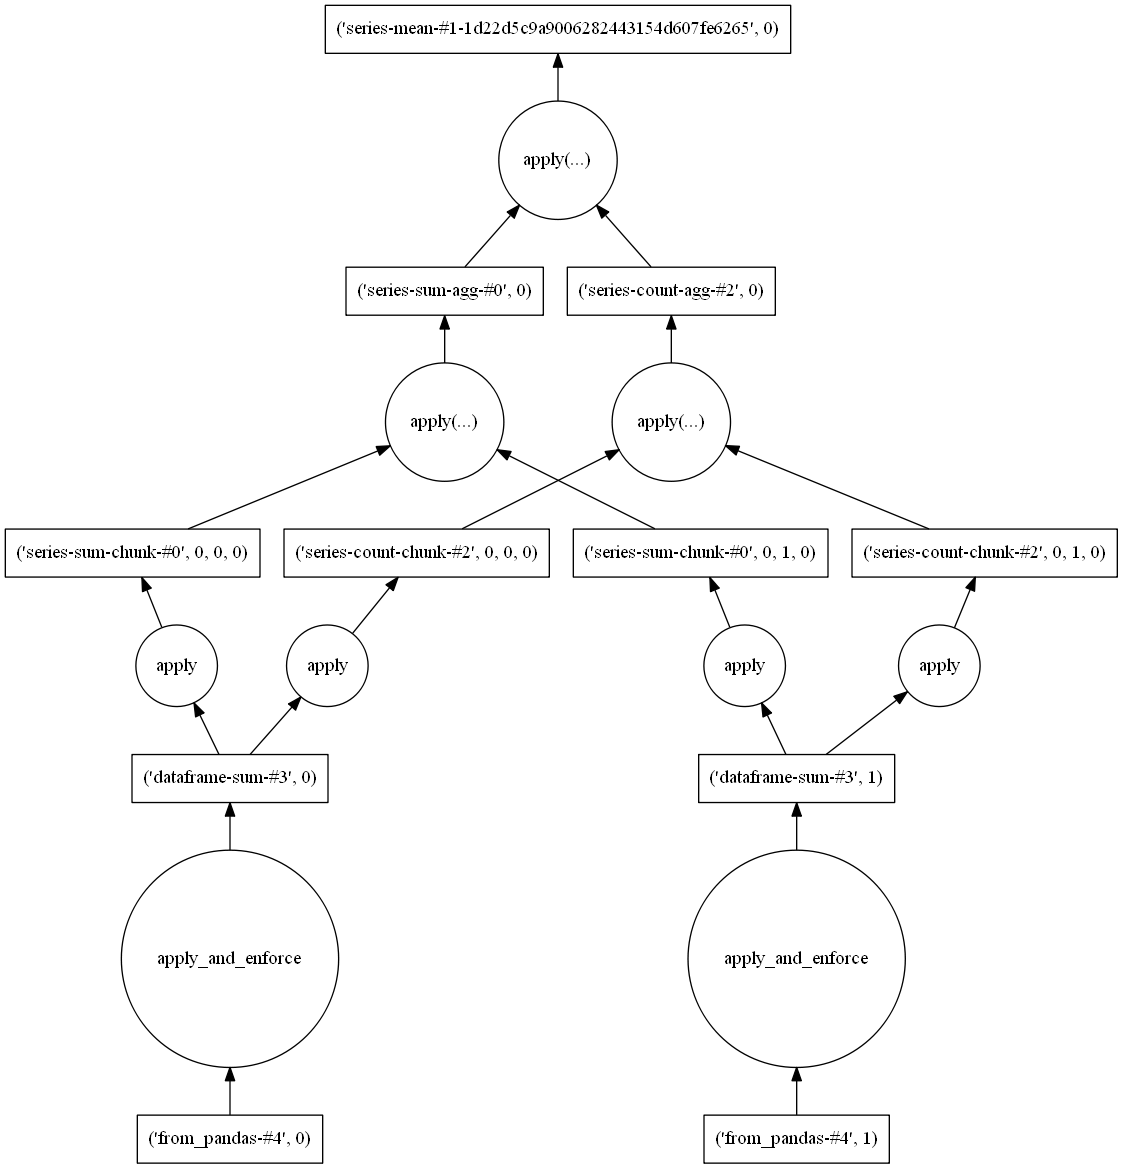

In [6]:
mean.visualize()

To actually *compute* the set of instructions, just use the following command:

In [ ]:
# Okay, whatever. Let me actually see the mean. How do I do that?
mean.compute()

Another key aspect of the `compute()` method is that is returns the origianl object type. That means, if you are using `np.array`s, `compute()` will return a `np.array` object. That means, for this example, I can leverage the `compute()` method to give me data I can easily plot using the pre-existing `pandas` functionality

In [ ]:
df.compute().plot()
plt.show()